# CLINT WP5 014 : Define drivers, lags and where to find them
### 2023/08/21

## Adapted to clusters of new experiments
### 2023/10/23 - 2023/10/27

## Adapted to DKRZ - Levante
### 2023/11/06 - ongoing
Change in the varspecs, so that time aggregation of original files is known

In [14]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy
import matplotlib.ticker as mticker
import CLINT001_functions as clint
import importlib
import math

In [15]:
importlib.reload(clint)

<module 'CLINT001_functions' from '/home/b/b382649/CLINT_WP5/CLINT001_functions.py'>

In [32]:
## DIRECTORIES
machine = 'DKRZ'

if machine == 'laptop':
    metadatadir = '~/Documents/CMCC-GoogleDrive/ERA5/'
    
if machine == 'workstation':
    metadatadir = '~/Documents/CLINT-GoogleDrive/ERA5/'
    
if machine == 'juno':
    homedir = '/users-home/csp/as18623/'
    workmetadir = '/work/csp/as18623/CLINT_metadata/'
    metadatadir = '/data/csp/as18623/CLINT_metadata/'

if machine == 'DKRZ':
    homedir = '/home/b/b382649/CLINT_WP5/'
    workmetadir = '/home/b/b382649/CLINT_WP5/metadata/'
    metadatadir = '/home/b/b382649/CLINT_WP5/metadata/'
    maskmotherdir = '/home/b/b382649/CLINT_WP5/Mask_Clusters/'
  

In [33]:
experiment = 5

In [34]:
if experiment == '3low':


    ### Lags for drivers
    lag_tmax_EU1 = np.arange(0,16)  ## Central Europe
    lag_tmax_EU2 = np.arange(30,41) ## North Atlantic
    lag_mslp_EU1 = np.arange(0,8)   ## Mediterranean
    lag_mslp_EU2 = np.arange(70,86) ## Eastern Europe
    lag_mslp_WO2 = np.arange(40,61) ## Greenland
    lag_sm_EU1 = np.arange(0,26)    ## Eastern Europe
    lag_sic_AC1 = np.arange(30,51)  ## North Atlantic and North Pacific


    drivers = pd.DataFrame({'var':['tmax','tmax','mslp','mslp','mslp','sm','sic'],#name of variable
                           'era5_var':['mx2t','mx2t','msl','msl','msl','swvl1','sic'], #name of variable in ERA5
                           'cmip6_var':['tasmax','tasmax','psl','psl','psl','mrso','sic'], #name of variable in CMIP6
                           'test_nr':[3,3,3,3,3,3,3], #id number of experimen
                           'cluster':['EU1t','EU2t','EU1p','EU2p','WO2p','EU1sm','AC1sic'], #code of cluster
                           'cluster_info':['Central Europe','North Atlantic','Mediterranean','Eastern Europe',
                                           'Greenland','Eastern Europe','North Atlantic and North Pacific'], #name of cluster
                           'minlag':[0,30,0,70,40,0,30], #minimum lead time to be considered
                           'maxlag':[16,41,8,86,61,26,51], #maximum lead time
                           'cluster_centre_lon':[14,-6,4,32,-78,24,np.nan], #centroid of the cluster, longitude
                           'cluster_centre_lat':[53,42,36,54,80,56,np.nan], #centroid of the cluster, latitude
                           'cl_ortho_lon':[14,0,14,29,-56,30,np.nan], #figure param: centre of projection, lon
                           'cl_ortho_lat':[49,50,40,51,72,54,np.nan], # as above but lat
                           'cl_ext_W':[-2,-18,-16,12,-85,14,np.nan], #fig param: extremes of clusters
                           'cl_ext_E':[30,18,44,46,-20,46,np.nan],
                           'cl_ext_S':[38,28,25,44,48,46,np.nan],
                           'cl_ext_N':[60,72,50,63,90,62,np.nan],
                           'text_plot_lon':[28,20,np.nan,np.nan,-35,np.nan,np.nan],# fig param: where to plot the lead time
                           'text_plot_lat':[58,65,np.nan,np.nan,55,np.nan,np.nan],
                           'fig_width':[60,60,60,60,72,60,np.nan], #figure width
                           'ax_width':[12,12,20,12,12,15,np.nan], #width of the plots that compose the figures
                           'ax_height':[10,16,8,8,10,10,np.nan], #height of the plots that compose the figures
                           'clmask_test3':['labels7t2mEurope5.csv','labels7t2mEurope5.csv',
                                           'labels1mslpEurope5.csv','labels1mslpEurope5.csv',
                                           'labels2mslpWorld5.csv','labels3sm1Europe5.csv',np.nan], 
                            #name of the file with cluster details
                           'cl_nr':[1,2,1,2,2,1,1], #number of the cluster as it appears in the file above
                           'vmin':[-10,-10,-20,-20,-20,-0.2,-0.2], #minimum value for the maps
                           'vmax':[10,10,20,20,20,0.2,0.2], #maximum value for the maps
                           'empty':[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]}) 
    drivers['meanlag'] = np.floor(drivers[['minlag', 'maxlag']].mean(axis=1)).astype(int)
    drivers.to_csv(f'{workmetadir}drivers_Test3low.csv', index=False)
    #drivers.to_csv(f'{metadatadir}drivers.csv', index=False)

In [35]:
## TEMPLATE FOR DRIVERS ROW

drivers_tmpl = pd.DataFrame({'var':[np.nan],#name of variable
                           'era5cds_var':[np.nan], #name of variable in ERA5 as they appear on cds
                           'era5cmor_var':[np.nan], #name of variable in ERA5 as they appear on DKRZ in cmorized format
                           'cmip6_var':[np.nan], #name of variable in CMIP6
                           'unit':[np.nan], #measurement unit
                           'exp':[np.nan], #id number of experimen
                           'exp_size':[np.nan], #number of clusters in the experiment
                           'domain':[np.nan], #Europe or World or North_Atlantic ot else
                           'cl_nr':[np.nan], #number of the cluster as it appears in the file above
                           'cl_name':[np.nan], #number of the cluster as it appears in the file above
                           'cl_code':[np.nan], #code of cluster
                           'cl_info':[np.nan], #name of cluster
                           'clmask_path':[np.nan], 
                            #path of the file with cluster details
                           'clmask_file':[np.nan], 
                            #file with cluster details
                           'minlag':[np.nan], #minimum lead time to be considered
                           'maxlag':[np.nan], #maximum lead time
                           'cl_centroid_lon':[np.nan], #centroid of the cluster, longitude
                           'cl_centroid_lat':[np.nan], #centroid of the cluster, latitude
                           'cl_ortho_lon':[np.nan], #figure param: centre of projection, lon
                           'cl_ortho_lat':[np.nan], # as above but lat
                           'cl_ext_W':[np.nan], #fig param: extremes of clusters
                           'cl_ext_E':[np.nan],
                           'cl_ext_S':[np.nan],
                           'cl_ext_N':[np.nan],
                           'vmin':[np.nan], #minimum value for the maps
                           'vmax':[np.nan], #maximum value for the maps
                           'text_plot_lon':[np.nan],# fig param: where to plot the lead time
                           'text_plot_lat':[np.nan],
                           'fig_width':[np.nan], #figure width
                           'ax_width':[np.nan], #width of the plots that compose the figures
                           'ax_height':[np.nan], #height of the plots that compose the figures
                           'empty':[np.nan]}) 

In [36]:
var_specs = pd.DataFrame({'var':['tmax','mslp','sm','z500','tp','sic'],
                          'unit':['°C','hPa','m^3/m^3','m','mm/day','%'],
                          'realm':['atmos','atmos','land','atmos','atmos','seaIce'],
                          'era5cds_var':['mx2t','msl','swvl1','z500','tp','sic'],
                          'era5cmor_var':['tasmax','psl','swvl1','zg','pr','sic'],
                          'cmip6_var':['tasmax','psl','mrsos','zg','pr','sic'],
                          'var4path':['mx2t','msl','sm1','z500','tp','sic'],
                          'era5_aggr':['day','1hr','1hr','day','day','1hr'],
                          'aggr_operator':['max','mean','mean','mean','sum','mean'],#operator for daily aggregation
                         'vmin':[-15,-25,-0.2,-250,-5,-50],#np.nan if automatic
                         'vmax':[15,25,0.2,250,-15,50]})
var_specs.to_csv(f'{workmetadir}variables_specifications.csv', index=False)
# Soil moisture in swvl1(ERA5) is stored as [m^3/m^3], while mrsos(CMIP6) is [kg/(m^2)]. Values in mrsos need to be divided by 100
# Total precipitation is [m] (equivalent to [m/day] in daily cumulated) in tp(ERA5) and [kg/(m^2*s)] in pr(CMIP6)
#       in order to obtain mm tp has to be multiplied by 1000 and pr by 86400

In [53]:
var_specs_old = pd.read_csv(f'{workmetadir}variables_specifications.csv')

add_varspec = pd.DataFrame({'var':['olr'],
                          'unit':['W/m^2'],
                          'realm':['atmos'],
                          'era5cds_var':['olr'],
                          'era5cmor_var':['rlut'],
                          'cmip6_var':['rlut'],
                          'var4path':['olr'],
                          'era5_aggr':['1hr'],
                          'aggr_operator':['mean'],#operator for daily aggregation
                          'vmin':[-50],#np.nan if automatic
                          'vmax':[np.nan]})

if (var_specs_old.loc[var_specs_old['var']==add_varspec['var'][0]].shape[0]==0):
    var_specs = pd.concat([var_specs,add_varspec],ignore_index=True)
    var_specs.to_csv(f'{workmetadir}variables_specifications.csv', index=False)
    print('YES! variable was correctly added')
else:
    print('NO! variable has been already added')

NO! variable has been already added


In [62]:
experiment = 5

if os.path.exists(f'{workmetadir}drivers{experiment}_Test.csv'):
    drivers_old = pd.read_csv(f'{workmetadir}drivers{experiment}_Test.csv')
else:
    drivers_old = pd.DataFrame(columns=drivers_tmpl.columns)



## these information should be read from a csv created by the algorithm
## at the moment this line contains details about the driver to be added

importlib.reload(clint)

experiment = 5
var = 'olr'
domain = 'World'  ## Europe, World, Artic
exp_size = 'low'
cl_nr = 3
minlag = 25
maxlag = 51

maskdir = f"{maskmotherdir}Test{experiment}{exp_size}_Clusters/"

drivers_input = pd.DataFrame({'exp': [experiment],
                              'var':[var],
                              'domain':[domain],
                              'exp_size':[exp_size],
                              'cl_nr':[cl_nr],
                              'minlag':[minlag],
                              'maxlag':[maxlag]})

clint.add_driver_row(drivers_old, drivers_input, drivers_tmpl, var_specs, maskdir, workmetadir)
drivers_new = pd.read_csv(f'{workmetadir}drivers{experiment}_Test.csv')


var_ctg = var_specs["var"]
domain_ctg = ["Europe","World","Artic",]
drivers_new["var"] = pd.Categorical(drivers_new["var"], categories = var_ctg)
drivers_new["domain"] = pd.Categorical(drivers_new["domain"], categories = domain_ctg)
drivers_new = drivers_new.sort_values(by = ["var","domain","cl_nr"]).reset_index(drop=True)
drivers_new.to_csv(f"{workmetadir}drivers{experiment}_Test.csv", index=False)



YES! Driver correctly added


/home/b/b382649/CLINT_WP5/CLINT001_functions.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drivers_addrow['cl_ortho_lon'] = ((((np.min(sub_mask.nodes_lon_360)+np.max(sub_mask.nodes_lon_360))/2)+180)%360)-180


In [63]:
drivers_new

,var,era5cds_var,era5cmor_var,cmip6_var,unit,exp,exp_size,domain,cl_nr,cl_name,...,cl_ext_S,cl_ext_N,vmin,vmax,text_plot_lon,text_plot_lat,fig_width,ax_width,ax_height,empty
0,tmax,NaN,tasmax,tasmax,°C,5.0,low,Europe,1.0,cl5low_Europe1_tmax,...,42.0,58.0,-15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
1,tmax,NaN,tasmax,tasmax,°C,5.0,low,Europe,2.0,cl5low_Europe2_tmax,...,39.0,63.5,-15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
2,mslp,NaN,psl,psl,hPa,5.0,low,Europe,3.0,cl5low_Europe3_mslp,...,57.0,71.0,-250.0,250.0,NaN,NaN,NaN,NaN,NaN,NaN
3,mslp,NaN,psl,psl,hPa,5.0,low,World,2.0,cl5low_World2_mslp,...,-76.0,-46.5,-250.0,250.0,NaN,NaN,NaN,NaN,NaN,NaN
4,sm,NaN,swvl1,mrsos,m^3/m^3,5.0,low,Europe,1.0,cl5low_Europe1_sm,...,42.0,62.0,-0.2,0.2,NaN,NaN,NaN,NaN,NaN,NaN
5,sm,NaN,swvl1,mrsos,m^3/m^3,5.0,low,Europe,2.0,cl5low_Europe2_sm,...,29.0,71.0,-0.2,0.2,NaN,NaN,NaN,NaN,NaN,NaN
6,sm,NaN,swvl1,mrsos,m^3/m^3,5.0,low,Europe,5.0,cl5low_Europe5_sm,...,34.0,51.0,-0.2,0.2,NaN,NaN,NaN,NaN,NaN,NaN
7,z500,z500,zg,zg,m,5.0,low,Europe,4.0,cl5low_Europe4_z500,...,29.0,55.0,-400.0,400.0,NaN,NaN,NaN,NaN,NaN,NaN
8,z500,z500,zg,zg,m,5.0,low,Europe,5.0,cl5low_Europe5_z500,...,44.5,60.5,-400.0,400.0,NaN,NaN,NaN,NaN,NaN,NaN
9,tp,tp,pr,pr,mm/day,5.0,low,Europe,1.0,cl5low_Europe1_tp,...,44.5,68.5,-5.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
drivers_new[['var','cl_ext_W','cl_ext_E','cl_ext_S','cl_ext_N','cl_ortho_lon','cl_ortho_lat']]

,var,cl_ext_W,cl_ext_E,cl_ext_S,cl_ext_N,cl_ortho_lon,cl_ortho_lat
0,tmax,20.5,45.0,42.0,58.0,32.75,50.000000
1,tmax,-11.5,24.0,39.0,63.5,6.25,51.250000
2,mslp,-17.0,10.0,57.0,71.0,-3.50,64.000000
3,mslp,-154.0,-67.5,-76.0,-46.5,-110.75,-61.250000
4,sm,-11.0,25.5,42.0,62.0,7.25,52.000000
5,sm,-17.0,45.0,29.0,71.0,14.00,50.000000
6,sm,7.0,45.0,34.0,51.0,26.00,42.500000
7,z500,-17.0,20.5,29.0,55.0,1.75,42.000000
8,z500,-17.0,14.0,44.5,60.5,-1.50,52.500000
9,tp,-5.0,33.0,44.5,68.5,14.00,56.500000


In [60]:
drivers_new = drivers_new.drop(index=14)

In [61]:
drivers_new.to_csv(f"{workmetadir}drivers{experiment}_Test.csv", index=False)

In [16]:
drivers_old.columns

Index(['var', 'era5_var', 'cmip6_var', 'unit', 'exp', 'exp_size', 'domain',
       'cl_nr', 'cl_name', 'cl_code', 'cl_info', 'clmask_path', 'clmask_file',
       'minlag', 'maxlag', 'cl_centroid_lon', 'cl_centroid_lat',
       'cl_ortho_lon', 'cl_ortho_lat', 'cl_ext_W', 'cl_ext_E', 'cl_ext_S',
       'cl_ext_N', 'vmin', 'vmax', 'text_plot_lon', 'text_plot_lat',
       'fig_width', 'ax_width', 'ax_height', 'empty'],
      dtype='object')

In [10]:
drivers_old

,var,cmip6_var,unit,exp,exp_size,domain,cl_nr,cl_name,cl_code,cl_info,...,vmin,vmax,text_plot_lon,text_plot_lat,fig_width,ax_width,ax_height,empty,era5cds_var,era5cmor_var
0,tmax,tasmax,°C,5,low,Europe,1,cl5low_Europe1_tmax,NaN,NaN,...,-10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tasmax
1,tmax,tasmax,°C,5,low,Europe,2,cl5low_Europe2_tmax,NaN,NaN,...,-10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tasmax
2,mslp,psl,hPa,5,low,Europe,3,cl5low_Europe3_mslp,NaN,NaN,...,-20.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,psl
3,mslp,psl,hPa,5,low,World,2,cl5low_World2_mslp,NaN,NaN,...,-20.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,psl
4,sm,mrsos,m^3/m^3,5,low,Europe,1,cl5low_Europe1_sm,NaN,NaN,...,-0.2,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,swvl1
5,sm,mrsos,m^3/m^3,5,low,Europe,2,cl5low_Europe2_sm,NaN,NaN,...,-0.2,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,swvl1
6,sm,mrsos,m^3/m^3,5,low,Europe,5,cl5low_Europe5_sm,NaN,NaN,...,-0.2,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,swvl1


In [66]:
## CREATE A NEW COLUMN WHICH IS BASED ON OTHER COLUMNS
#drivers_new['cl_name'] = drivers_new.apply(lambda row:"cl"+str(row["exp"])+row["exp_size"]+"_"+row["domain"]+str(row["cl_nr"])+'_'+row["var"] , axis = 1)


In [11]:
drivers_new

,var,era5cds_var,era5cmor_var,cmip6_var,unit,exp,exp_size,domain,cl_nr,cl_name,...,cl_ext_S,cl_ext_N,vmin,vmax,text_plot_lon,text_plot_lat,fig_width,ax_width,ax_height,empty
0,tmax,NaN,tasmax,tasmax,°C,5,low,Europe,1,cl5low_Europe1_tmax,...,42.0,58.0,-10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
1,tmax,NaN,tasmax,tasmax,°C,5,low,Europe,2,cl5low_Europe2_tmax,...,39.0,63.5,-10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2,mslp,NaN,psl,psl,hPa,5,low,Europe,3,cl5low_Europe3_mslp,...,57.0,71.0,-20.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
3,mslp,NaN,psl,psl,hPa,5,low,World,2,cl5low_World2_mslp,...,-76.0,-46.5,-20.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
4,sm,NaN,swvl1,mrsos,m^3/m^3,5,low,Europe,1,cl5low_Europe1_sm,...,42.0,62.0,-0.2,0.2,NaN,NaN,NaN,NaN,NaN,NaN
5,sm,NaN,swvl1,mrsos,m^3/m^3,5,low,Europe,2,cl5low_Europe2_sm,...,29.0,71.0,-0.2,0.2,NaN,NaN,NaN,NaN,NaN,NaN
6,sm,NaN,swvl1,mrsos,m^3/m^3,5,low,Europe,5,cl5low_Europe5_sm,...,34.0,51.0,-0.2,0.2,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
drivers_new.drop(columns=['era5_var','cmip6_var'])

,var,exp,exp_size,domain,cl_nr,cl_name,cl_code,cl_info,clmask_path,clmask_file,...,cl_ext_S,cl_ext_N,vmin,vmax,text_plot_lon,text_plot_lat,fig_width,ax_width,ax_height,empty
0,tmax,5,low,Europe,1,cl5low_Europe1_tmax,NaN,NaN,/data/csp/as18623/CLINT_metadata/Masks/Test5lo...,/data/csp/as18623/CLINT_metadata/Masks/Test5lo...,...,42.0,58.0,-10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
1,tmax,5,low,Europe,2,cl5low_Europe2_tmax,NaN,NaN,/data/csp/as18623/CLINT_metadata/Masks/Test5lo...,/data/csp/as18623/CLINT_metadata/Masks/Test5lo...,...,39.0,63.5,-10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2,mslp,5,low,Europe,3,cl5low_Europe3_mslp,NaN,NaN,/data/csp/as18623/CLINT_metadata/Masks/Test5lo...,/data/csp/as18623/CLINT_metadata/Masks/Test5lo...,...,57.0,71.0,-20.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
3,mslp,5,low,World,2,cl5low_World2_mslp,NaN,NaN,/data/csp/as18623/CLINT_metadata/Masks/Test5lo...,/data/csp/as18623/CLINT_metadata/Masks/Test5lo...,...,-76.0,-46.5,-20.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
4,sm,5,low,Europe,1,cl5low_Europe1_sm,NaN,NaN,/data/csp/as18623/CLINT_metadata/Masks/Test5lo...,/data/csp/as18623/CLINT_metadata/Masks/Test5lo...,...,42.0,62.0,-0.2,0.2,NaN,NaN,NaN,NaN,NaN,NaN
5,sm,5,low,Europe,2,cl5low_Europe2_sm,NaN,NaN,/data/csp/as18623/CLINT_metadata/Masks/Test5lo...,/data/csp/as18623/CLINT_metadata/Masks/Test5lo...,...,29.0,71.0,-0.2,0.2,NaN,NaN,NaN,NaN,NaN,NaN
6,sm,5,low,Europe,5,cl5low_Europe5_sm,NaN,NaN,/data/csp/as18623/CLINT_metadata/Masks/Test5lo...,/data/csp/as18623/CLINT_metadata/Masks/Test5lo...,...,34.0,51.0,-0.2,0.2,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
## ADD COLUMN WITH UNIT
drivers_new = drivers_new.drop(columns=['unit_y','var4path_y'])
drivers_new = pd.merge(var_specs,drivers_new)

In [47]:
## CHANGE VALUES IN A COLUMN

In [58]:
drivers_new.loc[drivers_new['var']=='sic','vmin'] = -50

In [59]:
drivers_new.loc[drivers_new['var']=='sic','vmax'] = 50

In [36]:
drivers_new.loc[drivers_new['var']=='tp','unit'] = 'mm/day'

In [26]:
drivers_new.loc[drivers_new['var']=='sic','cl_ortho_lat'] = 90

In [60]:
drivers_new[['var','vmax','cl_ortho_lat']]

,var,vmax,cl_ortho_lat
0,tmax,15.0,50.00
1,tmax,15.0,51.25
2,mslp,250.0,64.00
3,mslp,250.0,-61.25
4,sm,0.2,52.00
5,sm,0.2,50.00
6,sm,0.2,42.50
7,z500,400.0,42.00
8,z500,400.0,52.50
9,tp,15.0,56.50


In [31]:
drivers_new.columns

Index(['var', 'era5cds_var', 'era5cmor_var', 'cmip6_var', 'unit', 'exp',
       'exp_size', 'domain', 'cl_nr', 'cl_name', 'cl_code', 'cl_info',
       'clmask_path', 'clmask_file', 'minlag', 'maxlag', 'cl_centroid_lon',
       'cl_centroid_lat', 'cl_ortho_lon', 'cl_ortho_lat', 'cl_ext_W',
       'cl_ext_E', 'cl_ext_S', 'cl_ext_N', 'vmin', 'vmax', 'text_plot_lon',
       'text_plot_lat', 'fig_width', 'ax_width', 'ax_height', 'empty'],
      dtype='object')

In [ ]:
## CLUSTER PATH AND CLUSTER FILE

In [59]:
drivers_new.shape[0]

8

In [30]:
drivers_new['clmask_path']=['Test5low_Clusters/' for i in range(0,drivers_new.shape[0])]

In [36]:
drivers_new['clmask_file']=[drivers_new['clmask_file'].values[i].split('/')[-1] for i in range(0,drivers_new.shape[0])]

In [75]:
drivers_new.iloc[7]['clmask_file']=drivers_new['clmask_file'][7].split('/')[-1]

/tmp/ipykernel_997671/1979894669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drivers_new.iloc[7]['clmask_file']=drivers_new['clmask_file'][7].split('/')[-1]


In [82]:

drivers_new['cl_name']


0    cl5low_Europe1_tmax
1    cl5low_Europe2_tmax
2    cl5low_Europe3_mslp
3     cl5low_World2_mslp
4      cl5low_Europe1_sm
5      cl5low_Europe2_sm
6      cl5low_Europe5_sm
7    cl5low_Europe4_z500
Name: cl_name, dtype: object

In [ ]:
## ADD A COLUMN ON CMORIZED ERA5

In [27]:
drivers_new['era5cds_var'] = drivers_new['era5_var']

In [28]:
drivers_new['era5cmor_var'] = ['tasmax','tasmax','psl','psl','swvl1','swvl1','swvl1']

In [32]:
drivers_new['era5_var'].drop

<bound method Series.drop of 0    None
1    None
2    None
3    None
4    None
5    None
6    None
Name: era5_var, dtype: object>

In [37]:
drivers_new = drivers_new.drop(labels='era5_var', axis=1)

In [41]:
drivers_new['era5cmor_var']

0    tasmax
1    tasmax
2       psl
3       psl
4     swvl1
5     swvl1
6     swvl1
Name: era5cmor_var, dtype: object

In [368]:
# def add_driver_row (drivers_old, experiment, var, domain, exp_size, cl_nr, minlag, maxlag, drivers_tmpl)

#     if ((drivers_old.loc[(drivers_old['var']==drivers_input['var'][0]) &
#                     (drivers_old['domain']==drivers_input['domain'][0]) &
#                     (drivers_old['exp_size']==drivers_input['exp_size'][0]) &
#                     (drivers_old['cl_nr']==drivers_input['cl_nr'][0])].shape[0]) == 0):

#         drivers_addrow = drivers_tmpl


#         for clm in drivers_input.columns:
#             drivers_addrow[clm] = drivers_input[clm]

#         if drivers_addrow['var'][0] == 'mslp':
#             drivers_addrow['era5_var'] = 'msl'
#             drivers_addrow['cmip6_var'] = 'pls'
#             drivers_addrow['vmin'] = -20
#             drivers_addrow['vmax'] = 20

#         if drivers_addrow['var'][0] == 'tmax':
#             drivers_addrow['era5_var'] = 't2m'
#             drivers_addrow['cmip6_var'] = 'tasmax'
#             drivers_addrow['vmin'] = -10
#             drivers_addrow['vmax'] = 10

#         if drivers_addrow['exp_size'][0] == 'low':
#             tot_num_cl = 5
#         if drivers_addrow['exp_size'][0] == 'middle':
#             tot_num_cl = 10
#         if drivers_addrow['exp_size'][0] == 'high':
#             tot_num_cl = 20

#         #/data/csp/as18623/CLINT_metadata/Masks/Test5low_Clusters
#         drivers_addrow['exp'] = experiment
#         drivers_addrow['clmask_path'] = f"/data/csp/as18623/CLINT_metadata/Masks/Test{drivers_addrow['exp'][0]}{drivers_addrow['exp_size'][0]}_Clusters/"

#         maskfile = glob.glob(drivers_addrow['clmask_path'][0] + f"labels??{drivers_addrow['era5_var'][0]}{drivers_addrow['domain'][0]}{tot_num_cl}.csv")[0]
#         mask = pd.read_csv(maskfile,index_col=[0])
#         sub_mask = mask.loc[mask.cluster == drivers_addrow['cl_nr'][0]-1]

#         ## determine latlon box for graphical needs

#         drivers_addrow['cl_ext_S'] = np.min(sub_mask.nodes_lat) - 1
#         drivers_addrow['cl_ext_N'] = np.max(sub_mask.nodes_lat) + 1
#         drivers_addrow['cl_ext_W'] = np.min(sub_mask.nodes_lon) - 1
#         drivers_addrow['cl_ext_E'] = np.max(sub_mask.nodes_lon) + 1    
#         drivers_addrow['cl_ortho_lat'] = (np.min(sub_mask.nodes_lat)+np.max(sub_mask.nodes_lat))/2
#         drivers_addrow['cl_ortho_lon'] = (np.min(sub_mask.nodes_lon)+np.max(sub_mask.nodes_lon))/2

#         drivers_new = pd.concat([drivers_old,drivers_addrow])
#         drivers_new.to_csv(f'{workmetadir}drivers{experiment}_Test.csv', index=False)
#         print('YES! Driver correctly added')
#     else:
#         print('NO! This driver has already been added')

NO! This driver has already been added


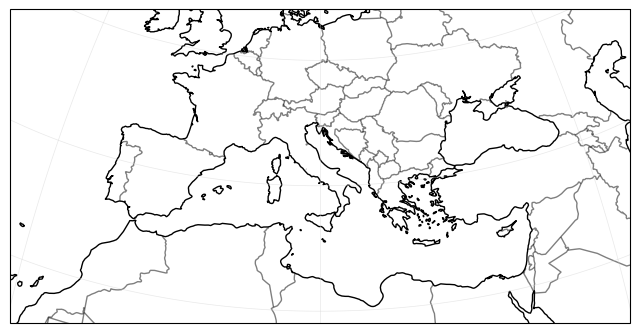

In [314]:
   
    
# lonlatproj = ccrs.PlateCarree()
# fig, axs = plt.subplots(1, 1,
#                         subplot_kw={'projection': lonlatproj},
#                         figsize=(8,8),
#                         sharey=True,sharex=True)#,
#                         #layout="constrained")
# #axs = axs.flatten()
# axs.remove()
# geo_axes = plt.subplot(1, 1, 1,
#                        projection=ccrs.Orthographic(central_longitude=drivers_addrow['cl_ortho_lon'][0],
#                                                     central_latitude=drivers_addrow['cl_ortho_lat'][0]))
# my_projn = ccrs.Orthographic(central_longitude=drivers_addrow['cl_ortho_lon'][0],
#                                                     central_latitude=drivers_addrow['cl_ortho_lat'][0])
# geo_axes.coastlines()
# geo_axes.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)

# # These chunk, first takes the limits of the box then calculates the coordinated in the projection
# # In the last line, the extreme coordinates in the new reference are identified
# # These extremes are give to set_extent()
# SW_lon, SW_lat = my_projn.transform_point(drivers_addrow['cl_ext_W'][0], 
#                                         drivers_addrow['cl_ext_S'][0], 
#                                         lonlatproj)  #(0.0, -3189068.5)
# NE_lon, NE_lat = my_projn.transform_point(drivers_addrow['cl_ext_E'][0], 
#                                         drivers_addrow['cl_ext_N'][0], 
#                                         lonlatproj) #(3189068.5, 0)
# NW_lon, NW_lat = my_projn.transform_point(drivers_addrow['cl_ext_W'][0], 
#                                         drivers_addrow['cl_ext_N'][0], 
#                                         lonlatproj)  #(0.0, -3189068.5)
# SE_lon, SE_lat = my_projn.transform_point(drivers_addrow['cl_ext_E'][0], 
#                                         drivers_addrow['cl_ext_S'][0], 
#                                         lonlatproj) #(3189068.5, 0)
# SC_lon, SC_lat = my_projn.transform_point(drivers_addrow['cl_ortho_lon'][0], 
#                                         drivers_addrow['cl_ext_S'][0], 
#                                         lonlatproj) #(3189068.5, 0)
# NC_lon, NC_lat = my_projn.transform_point(drivers_addrow['cl_ortho_lon'][0], 
#                                         drivers_addrow['cl_ext_N'][0], 
#                                         lonlatproj) #(3189068.5, 0)

# xmin,xmax,ymin,ymax = min(SW_lon,NW_lon), max(NE_lon,SE_lon), min(SW_lat,SE_lat,SC_lat), max(NE_lat,NW_lat, NC_lat)
# geo_axes.set_extent([xmin,xmax,ymin,ymax], crs=my_projn) # data/projection coordinates

# # geo_axes.set_extent([drivers_addrow['cl_ext_W'][0],
# #                     drivers_addrow['cl_ext_E'][0],
# #                     drivers_addrow['cl_ext_S'][0],
# #                     drivers_addrow['cl_ext_N'][0]],
# #                     crs = proj)    
# gl = geo_axes.gridlines(proj,linewidth=0.5, color='lightgray', alpha=0.5)
# #, xlocator=np.arange(-180, 180, 5), ylocator=np.arange(-90, 90, 5)
# gl.xlocator = mticker.FixedLocator([np.min(sub_mask.nodes_lon),
#                                     drivers_addrow['cl_ortho_lon'][0],
#                                     np.max(sub_mask.nodes_lon)])
# gl.ylocator = mticker.FixedLocator([np.min(sub_mask.nodes_lat),
#                                     drivers_addrow['cl_ortho_lat'][0],
#                                     np.max(sub_mask.nodes_lat)])

In [ ]:



# # These chunk, first takes the limits of the box then calculates the coordinated in the projection
# # In the last line, the extreme coordinates in the new reference are identified
# # These extremes are give to set_extent()
# SW_lon, SW_lat = my_projn.transform_point(drivers_addrow['cl_ext_W'][0], 
#                                         drivers_addrow['cl_ext_S'][0], 
#                                         lonlatproj)  #(0.0, -3189068.5)
# NE_lon, NE_lat = my_projn.transform_point(drivers_addrow['cl_ext_E'][0], 
#                                         drivers_addrow['cl_ext_N'][0], 
#                                         lonlatproj) #(3189068.5, 0)
# NW_lon, NW_lat = my_projn.transform_point(drivers_addrow['cl_ext_W'][0], 
#                                         drivers_addrow['cl_ext_N'][0], 
#                                         lonlatproj)  #(0.0, -3189068.5)
# SE_lon, SE_lat = my_projn.transform_point(drivers_addrow['cl_ext_E'][0], 
#                                         drivers_addrow['cl_ext_S'][0], 
#                                         lonlatproj) #(3189068.5, 0)
# SC_lon, SC_lat = my_projn.transform_point(drivers_addrow['cl_ortho_lon'][0], 
#                                         drivers_addrow['cl_ext_S'][0], 
#                                         lonlatproj) #(3189068.5, 0)
# NC_lon, NC_lat = my_projn.transform_point(drivers_addrow['cl_ortho_lon'][0], 
#                                         drivers_addrow['cl_ext_N'][0], 
#                                         lonlatproj) #(3189068.5, 0)

# xmin,xmax,ymin,ymax = min(SW_lon,NW_lon), max(NE_lon,SE_lon), min(SW_lat,SE_lat,SC_lat), max(NE_lat,NW_lat, NC_lat)
# geo_axes.set_extent([xmin,xmax,ymin,ymax], crs=my_projn) # data/projection coordinates